In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score,roc_curve

In [2]:
df=pd.read_csv("../Datasets/heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

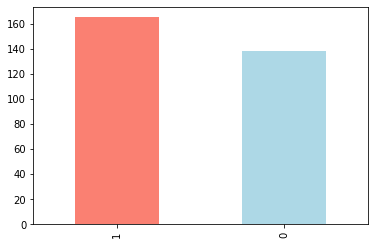

In [4]:
df['target'].value_counts().plot(kind='bar',color=['salmon','lightblue'])

In [5]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [6]:
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


(array([0, 1]), <a list of 2 Text xticklabel objects>)

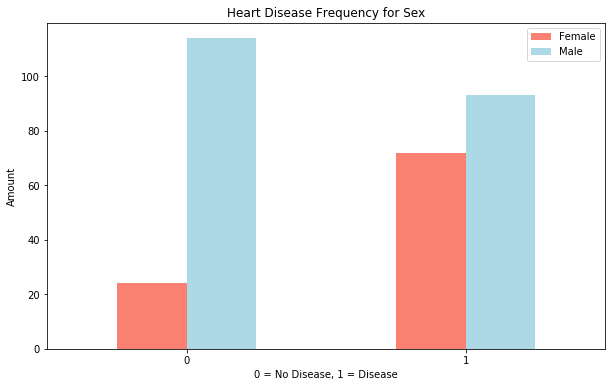

In [7]:
pd.crosstab(df.target,df.sex).plot(kind='bar',
                                   figsize=(10,6),
                                   color=['salmon','lightblue'])
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel('Amount')
plt.legend(['Female','Male']);
plt.xticks(rotation=0)

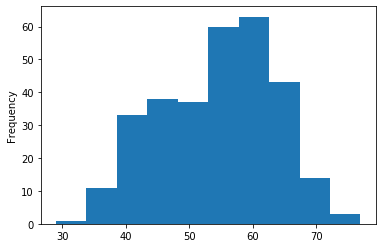

In [8]:
df.age.plot.hist();

In [9]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

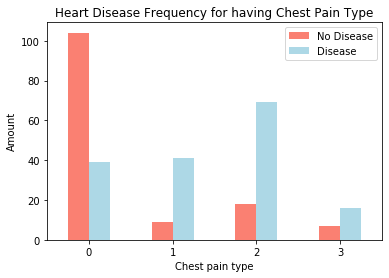

In [10]:
pd.crosstab(df.cp,df.target).plot(kind='bar',
                                  figsize=(6,4),
                                  color=['salmon','lightblue'])
plt.title("Heart Disease Frequency for having Chest Pain Type")
plt.xlabel('Chest pain type')
plt.ylabel('Amount')
plt.legend(['No Disease','Disease'])
plt.xticks(rotation=0)

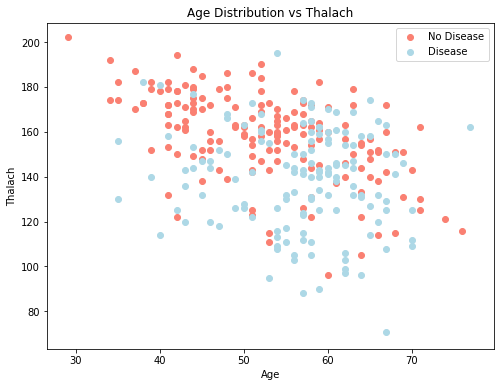

In [11]:
plt.figure(figsize=(8,6))
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c='salmon')
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c='lightblue')
plt.title('Age Distribution vs Thalach')
plt.xlabel('Age')
plt.ylabel('Thalach')
plt.legend(['No Disease','Disease'])

In [12]:
df.corr()   #Correlation Matrix

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


(14.0, 0.0)

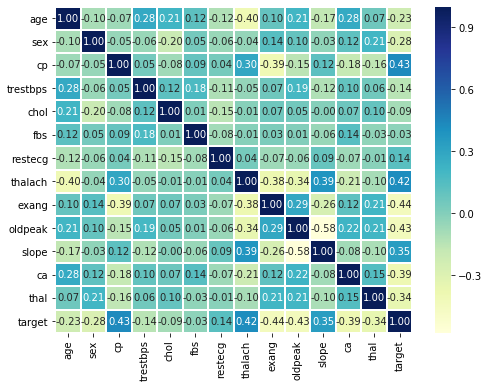

In [13]:
corr_matrix=df.corr()
fig,ax=plt.subplots(figsize=(8,6))
ax=sns.heatmap(corr_matrix,
               annot=True,
               linewidths=1,
               fmt='.2f',
               cmap='YlGnBu');
bottom,top=ax.get_ylim()
ax.set_ylim(bottom + 0.5 , top - 0.5)

## 5. Modeling

In [14]:
x = df.drop('target',axis=1)
y = df['target']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

models = {'Logistic Regression': LogisticRegression(),
          'KNN': KNeighborsClassifier(),
          'Random Forest' : RandomForestClassifier()}

def fit_and_score(models,x_train,y_train,x_test,y_test):
    
    np.random.seed(42)
    model_score={}
    
    for name, model in models.items():
        model.fit(x_train,y_train)
        model_score[name] = model.score(x_test,y_test)
        
    return model_score

In [15]:
model_scores = fit_and_score(models=models,
                             x_train=x_train,
                             y_train=y_train,
                             x_test=x_test,
                             y_test=y_test)
model_scores

C:\Users\abhinav\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\abhinav\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


{'Logistic Regression': 0.8688524590163934,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8524590163934426}

## Model Comparision

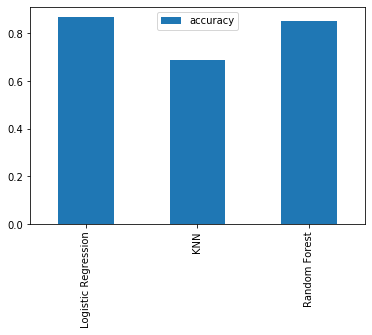

In [16]:
model_compare=pd.DataFrame(model_scores, index=['accuracy'])
#model_compare
model_compare.T.plot.bar()

## Hyeperparameter Tuning 
1. KNN

In [17]:
train_scores=[]
test_scores=[]

neighbors=range(1,21)
knn=KNeighborsClassifier()

for i in neighbors:
    knn.set_params(n_neighbors=i)
    knn.fit(x_train, y_train)
    train_scores.append(knn.score(x_train,y_train))
    test_scores.append(knn.score(x_test,y_test))

for i in range(20):
    print(train_scores[i],test_scores[i])

1.0 0.6229508196721312
0.8099173553719008 0.639344262295082
0.7727272727272727 0.6557377049180327
0.743801652892562 0.6721311475409836
0.7603305785123967 0.6885245901639344
0.7520661157024794 0.7213114754098361
0.743801652892562 0.7049180327868853
0.7231404958677686 0.6885245901639344
0.71900826446281 0.6885245901639344
0.6942148760330579 0.7049180327868853
0.7272727272727273 0.7540983606557377
0.6983471074380165 0.7377049180327869
0.6900826446280992 0.7377049180327869
0.6942148760330579 0.7377049180327869
0.6859504132231405 0.6885245901639344
0.6735537190082644 0.7213114754098361
0.6859504132231405 0.6885245901639344
0.6652892561983471 0.6885245901639344
0.6818181818181818 0.7049180327868853
0.6694214876033058 0.6557377049180327


Maximum KNN score on test Dataset is 75.41


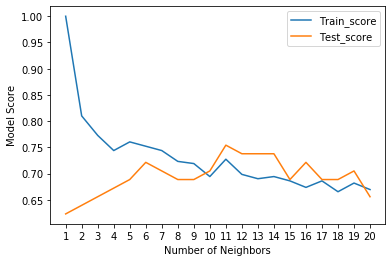

In [18]:
plt.plot(neighbors,train_scores,label="Train_score")
plt.plot(neighbors,test_scores,label="Test_score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of Neighbors")
plt.ylabel("Model Score")
plt.legend()

print(f'Maximum KNN score on test Dataset is {max(test_scores)*100:.2f}')

## Hyperparameter tuning with RandomizedSearchCV
1. Logistic Regression
2. Random Forest Classifier

In [19]:
#Grid for Logistic Regression
log_reg_grid = {"C": np.logspace(-4,4,20),
                "solver": ['liblinear']}

#Grid for Random Forest Classifier
rf_grid={"n_estimators": np.arange(10,1000,50),
         "max_depth": [None, 3, 5, 10],
         "min_samples_split": np.arange(2,20,2),
         "min_samples_leaf": np.arange(1,20,2)}

In [20]:
#Tune Logistic Regeression
np.random.seed(42)

rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

rs_log_reg.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.7s finished
C:\Users\abhinav\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='warn', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='warn', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='warn', n_iter=20, n_jobs=None,
                   param_distributi...
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+0

In [21]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [22]:
rs_log_reg.score(x_test,y_test)                        # more then previous one

0.8852459016393442

In [23]:
# set Hyperparameter for RandomForestCLassifier
np.random.seed(42)

rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           verbose=True,
                           n_iter=20)

rs_rf.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.3min finished
C:\Users\abhinav\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [24]:
# Find  Best Parameters
rs_rf.best_params_

{'n_estimators': 560,
 'min_samples_split': 12,
 'min_samples_leaf': 15,
 'max_depth': 3}

In [25]:
rs_rf.score(x_test,y_test)                                                       #Improved from Previous One

0.8688524590163934

## Hyperparameter tuning with  Grid SearchCV
since here we have got Logisitic Regression best

In [26]:
# Logisitic Regression tunning

log_reg_grid = {"C": np.logspace(-4,4,30),
                "solver": ['liblinear']}

np.random.seed(42)

gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

gs_log_reg.fit(x_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    1.1s finished
C:\Users\abhinav\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': array([1.0000000...
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.

In [27]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [28]:
gs_log_reg.score(x_test,y_test)

0.8852459016393442

## Evaluating
1. ROC curve and AUC curve
2. classification Report, Confusion Matrix
3. f1_score, recall_score, precision_score, accuracy_score

In [29]:
#for plotting roc curve
#from scikitplot.metrics import plot_roc_curve
#plot_roc_curve(gs_log_reg,x_test,y_test)
y_preds = gs_log_reg.predict(x_test)

In [30]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_preds)

0.8841594827586207

In [41]:
#Plotting Confusion Matrix

print(confusion_matrix(y_test,y_preds))

[[25  4]
 [ 3 29]]


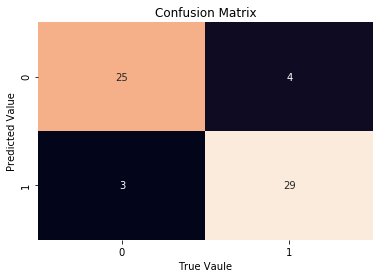

In [42]:
def plot_conf_mat(y_test,y_preds):
    fig,ax = plt.subplots()
    ax = sns.heatmap(confusion_matrix(y_test,y_preds),
                     annot=True,
                     cbar=False)
    bottom,top=ax.get_ylim()
    ax.set_ylim(bottom+0.5,top-0.5)
    plt.xlabel("True Vaule")
    plt.ylabel("Predicted Value")
    plt.title("Confusion Matrix")

plot_conf_mat(y_test,y_preds)

In [43]:
#Classification Report
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



## Evaluation using Corss Validation  (using cross_val_score)
calculate all the scores (precision_score, f1_score, recall_score etc.)

In [44]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [49]:
clf = LogisticRegression(C=0.20433597178569418, solver='liblinear')

cv_acc = cross_val_score(clf,x,y,cv=5,scoring='accuracy')
cv_acc

array([0.81967213, 0.90163934, 0.86885246, 0.88333333, 0.75      ])

In [50]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8446994535519124

In [51]:
cv_pre = cross_val_score(clf,x,y,cv=5,scoring='precision')
cv_pre = np.mean(cv_pre)
cv_pre

0.8207936507936507

In [52]:
cv_f1 = cross_val_score(clf,x,y,cv=5,scoring='f1')
cv_f1 = np.mean(cv_f1)
cv_f1

0.8673007976269721

In [53]:
cv_recall = cross_val_score(clf,x,y,cv=5,scoring='recall')
cv_recall = np.mean(cv_recall)
cv_recall

0.9212121212121213

## Visualization

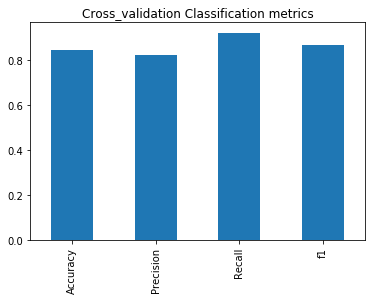

In [56]:
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                           "Precision": cv_pre,
                           "Recall": cv_recall,
                           "f1": cv_f1},
                           index=[0])


cv_metrics.T.plot.bar(title="Cross_validation Classification metrics",legend=False)

## Features Importance
it tells you how every columns is correlated with target columns.

In [57]:
clf = LogisticRegression(C=0.20433597178569418, solver='liblinear')
clf.fit(x_train,y_train)

LogisticRegression(C=0.20433597178569418, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [58]:
clf.coef_

array([[ 0.00316728, -0.86044651,  0.66067041, -0.01156993, -0.00166374,
         0.04386107,  0.31275847,  0.02459361, -0.6041308 , -0.56862804,
         0.45051628, -0.63609897, -0.67663373]])

In [65]:
feature_dict = dict(zip(df.columns,list(clf.coef_[0])))
feature_dict

{'age': 0.0031672801993431563,
 'sex': -0.8604465072345515,
 'cp': 0.6606704082033799,
 'trestbps': -0.01156993168080875,
 'chol': -0.001663744504776871,
 'fbs': 0.043861071652469864,
 'restecg': 0.31275846822418324,
 'thalach': 0.024593613737779126,
 'exang': -0.6041308000615746,
 'oldpeak': -0.5686280368396555,
 'slope': 0.4505162797258308,
 'ca': -0.6360989676086223,
 'thal': -0.6766337263029825}

In [62]:
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.003167,-0.860447,0.66067,-0.01157,-0.001664,0.043861,0.312758,0.024594,-0.604131,-0.568628,0.450516,-0.636099,-0.676634


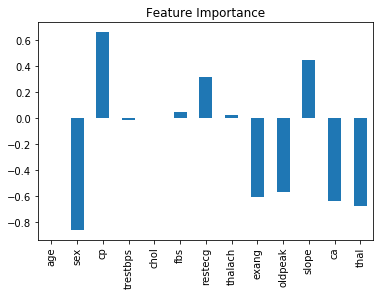

In [63]:
feature_df.T.plot.bar(title="Feature Importance",legend=False)